# Image Enhancement and Filtering Techniques - Spatial Domain


## Basic Point Operations for Image Enhancement

Basic point operations are fundamental techniques in digital image processing that modify pixel values to enhance image quality or extract specific features.

## Contrast Stretching
- Improves image contrast by stretching the range of intensity values
- Maps the original intensity values to span the full range (0-255)
- Useful when image has low contrast or narrow intensity range

## Thresholding
- Converts grayscale image to binary image
- Pixels above threshold become white (255)
- Pixels below threshold become black (0)
- Effective for segmentation and object detection

## Digital Negative
- Inverts pixel intensities
- New pixel value = 255 - original value
- Useful for enhancing white or gray details in dark regions
- Common in medical imaging

## Intensity Level Slicing
- Highlights specific range of intensities
- Pixels within range are set to maximum value
- Pixels outside range are set to minimum value
- Helps visualize structures with similar intensity levels

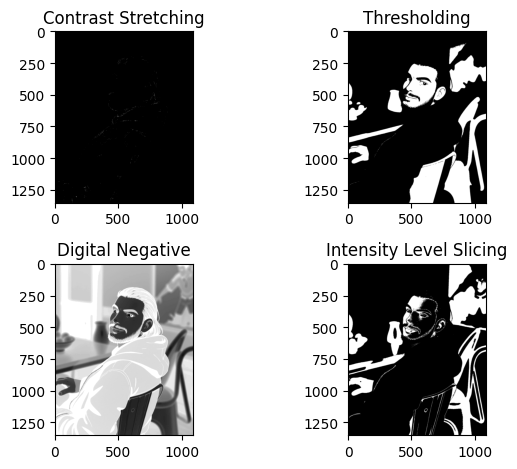

In [18]:
import numpy as np
import cv2

import matplotlib.pyplot as plt

# load image
img = cv2.imread('images/myimg.png', cv2.IMREAD_GRAYSCALE)

# Contrast Stretching
def contrast_stretch(img):
    min_val = np.min(img)
    max_val = np.max(img)
    return ((img - min_val) * 255 / (max_val - min_val)).astype(np.uint8)

contrast_img = contrast_stretch(img)
plt.subplot(221)
plt.title('Contrast Stretching')
plt.imshow(contrast_img, cmap='gray')

_, thresh_img = cv2.threshold(img, 127, 255, cv2.THRESH_BINARY)
plt.subplot(222)
plt.title('Thresholding')
plt.imshow(thresh_img, cmap='gray')

negative_img = 255 - img
plt.subplot(223)  
plt.title('Digital Negative')
plt.imshow(negative_img, cmap='gray')

def intensity_slice(img, min_range=100, max_range=200):
    sliced = img.copy()
    sliced[(img >= min_range) & (img <= max_range)] = 255
    sliced[(img < min_range) | (img > max_range)] = 0
    return sliced

sliced_img = intensity_slice(img)
plt.subplot(224)  
plt.title('Intensity Level Slicing')
plt.imshow(sliced_img, cmap='gray')

plt.tight_layout()
plt.show()

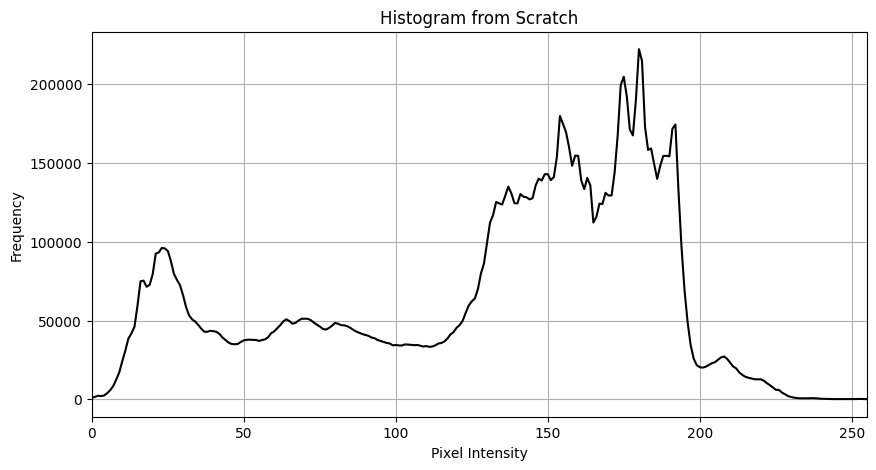

In [19]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def calculate_histogram(image):
    hist = np.zeros(256)
    for pixel in image.ravel():
        hist[pixel] += 1
    return hist

image = cv2.imread('gg.png', cv2.IMREAD_GRAYSCALE)
histogram = calculate_histogram(image)
plt.figure(figsize=(10, 5))
plt.plot(histogram, color='black')
plt.title('Histogram from Scratch')
plt.xlabel('Pixel Intensity')
plt.ylabel('Frequency')
plt.xlim([0, 255])
plt.grid()
plt.show()

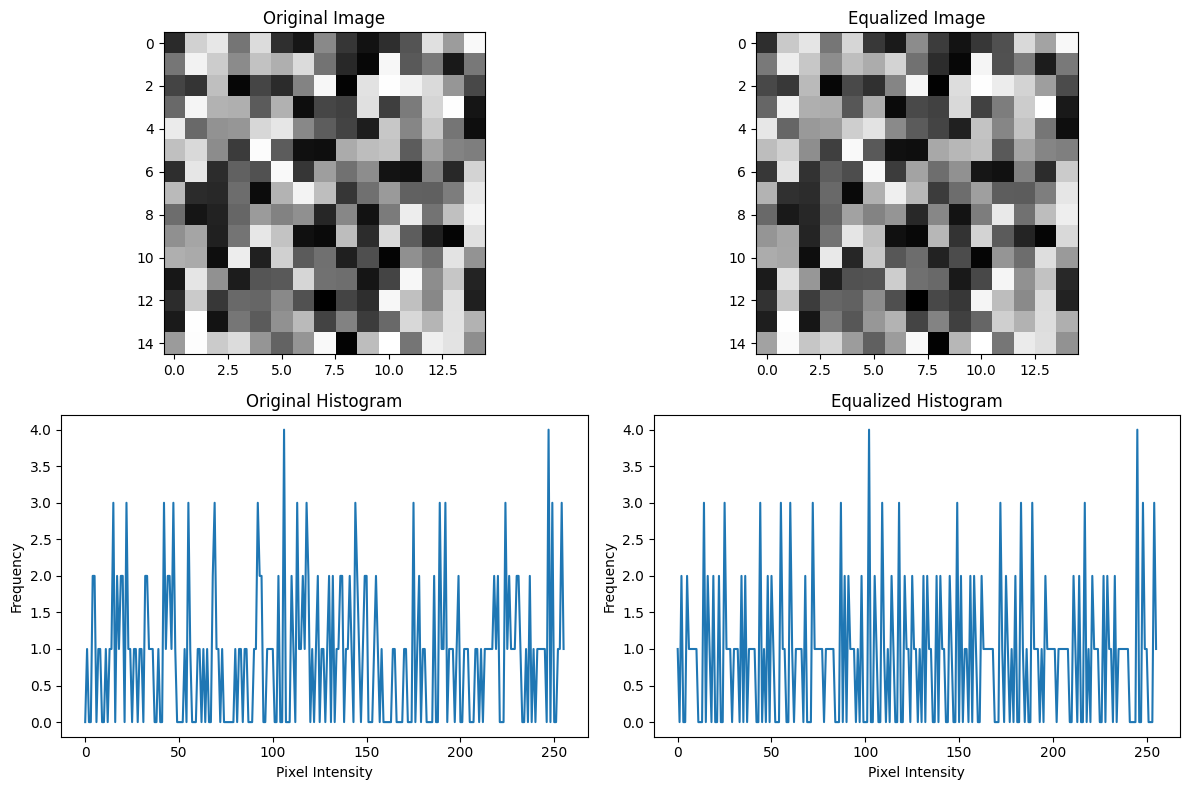

In [20]:
# create a random 30x30 image
test_image = np.random.randint(0, 256, size=(15, 15), dtype=np.uint8)

equalized = cv2.equalizeHist(test_image)

fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(12, 8))

ax1.imshow(test_image, cmap='gray')
ax1.set_title('Original Image')
ax2.imshow(equalized, cmap='gray')
ax2.set_title('Equalized Image')

original_hist = calculate_histogram(test_image)
equalized_hist = calculate_histogram(equalized)

ax3.plot(original_hist)
ax3.set_title('Original Histogram')
ax3.set_xlabel('Pixel Intensity')
ax3.set_ylabel('Frequency')

ax4.plot(equalized_hist)
ax4.set_title('Equalized Histogram')
ax4.set_xlabel('Pixel Intensity')
ax4.set_ylabel('Frequency')

plt.tight_layout()
plt.show()

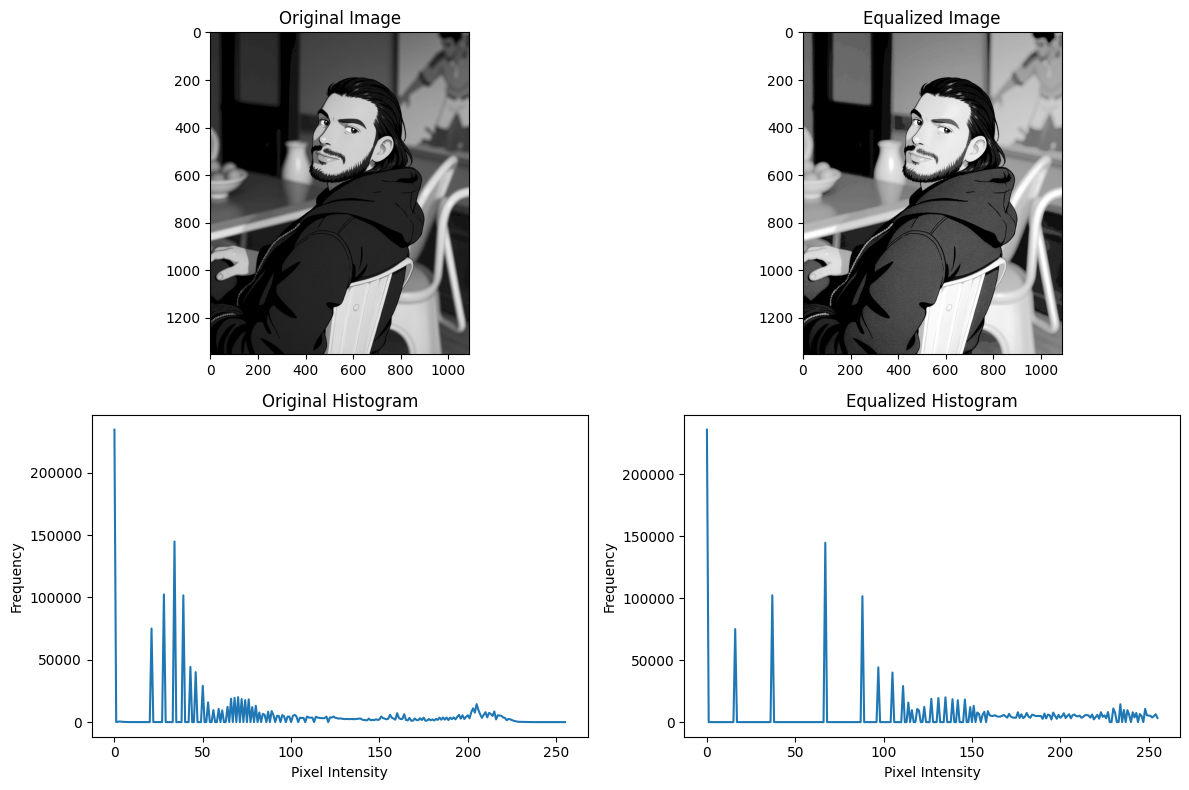

In [21]:
# load image
img = cv2.imread('images/myimg.png', cv2.IMREAD_GRAYSCALE)
equalized = cv2.equalizeHist(img)

fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(12, 8))

ax1.imshow(img, cmap='gray')
ax1.set_title('Original Image')
ax2.imshow(equalized, cmap='gray')
ax2.set_title('Equalized Image')

original_hist = calculate_histogram(img)
equalized_hist = calculate_histogram(equalized)

ax3.plot(original_hist)
ax3.set_title('Original Histogram')
ax3.set_xlabel('Pixel Intensity')
ax3.set_ylabel('Frequency')

ax4.plot(equalized_hist)
ax4.set_title('Equalized Histogram')
ax4.set_xlabel('Pixel Intensity')
ax4.set_ylabel('Frequency')

plt.tight_layout()
plt.show()

### Padded Image Creation


Original Image:
[[100 150 200 250]
 [120 160 210 220]
 [130 170 190 240]
 [110 140 180 230]]

Padded Image:
[[  0   0   0   0   0   0]
 [  0 100 150 200 250   0]
 [  0 120 160 210 220   0]
 [  0 130 170 190 240   0]
 [  0 110 140 180 230   0]
 [  0   0   0   0   0   0]]

Accessing each pixel in padded image:
Pixel at (2,4): 220


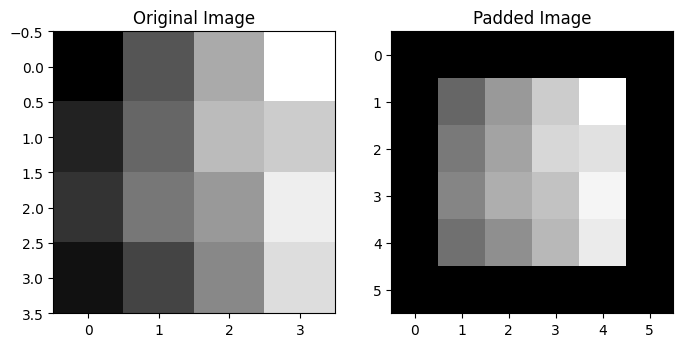

In [35]:
simple_image = np.array([
    [100, 150, 200, 250],
    [120, 160, 210, 220],
    [130, 170, 190, 240],
    [110, 140, 180, 230]
], dtype=np.uint8)

padded_image = np.pad(simple_image, pad_width=1, mode='constant', constant_values=0)

print("Original Image:")
print(simple_image)
print("\nPadded Image:")
print(padded_image)

# Access and print each pixel
print("\nAccessing each pixel in padded image:")
# for i in range(padded_image.shape[0]):
#     for j in range(padded_image.shape[1]):
print(f"Pixel at ({2},{4}): {padded_image[2,4]}")

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(8, 4))
ax1.imshow(simple_image, cmap='gray')
ax1.set_title('Original Image')
ax2.imshow(padded_image, cmap='gray')
ax2.set_title('Padded Image')
plt.show()

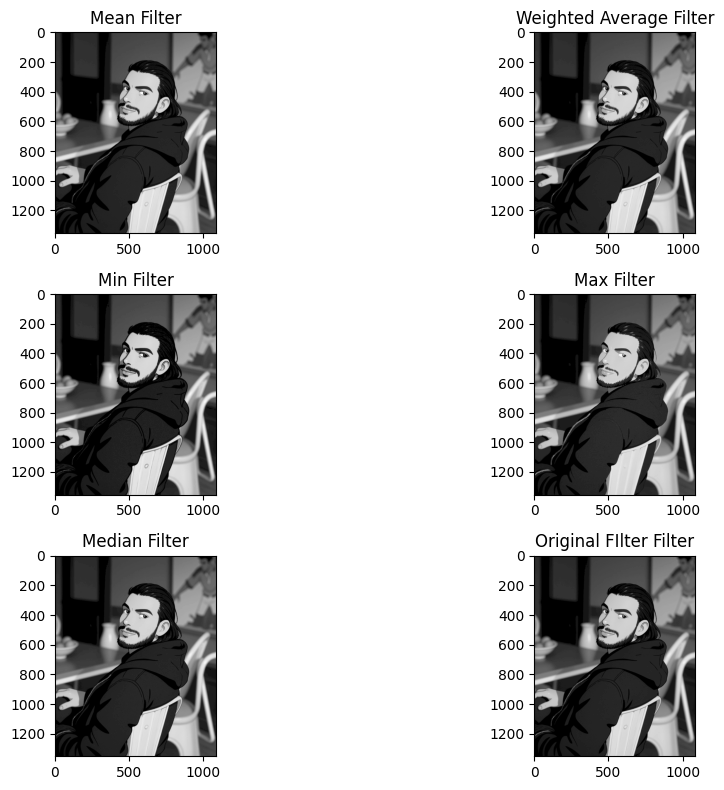

In [39]:

def apply_mean_filter(image, kernel_size=3):
    padded = np.pad(image, pad_width=kernel_size//2, mode='reflect')
    result = np.zeros_like(image)
    for i in range(image.shape[0]):
        for j in range(image.shape[1]):
            result[i,j] = np.mean(padded[i:i+kernel_size, j:j+kernel_size])
    return result.astype(np.uint8)

def apply_weighted_average(image, kernel_size=3):
    padded = np.pad(image, pad_width=kernel_size//2, mode='reflect')
    result = np.zeros_like(image)
    # Create weighted kernel (center pixel has higher weight)
    weights = np.ones((kernel_size, kernel_size))
    center = kernel_size // 2
    weights[center, center] = 2  
    weights = weights / np.sum(weights)  # Normalize weights
    
    for i in range(image.shape[0]):
        for j in range(image.shape[1]):
            window = padded[i:i+kernel_size, j:j+kernel_size]
            result[i,j] = np.sum(window * weights)
    return result.astype(np.uint8)

def apply_min_filter(image, kernel_size=3):
    padded = np.pad(image, pad_width=kernel_size//2, mode='reflect')
    result = np.zeros_like(image)
    for i in range(image.shape[0]):
        for j in range(image.shape[1]):
            result[i,j] = np.min(padded[i:i+kernel_size, j:j+kernel_size])
    return result.astype(np.uint8)

def apply_max_filter(image, kernel_size=3):
    padded = np.pad(image, pad_width=kernel_size//2, mode='reflect')
    result = np.zeros_like(image)
    for i in range(image.shape[0]):
        for j in range(image.shape[1]):
            result[i,j] = np.max(padded[i:i+kernel_size, j:j+kernel_size])
    return result.astype(np.uint8)

def apply_median_filter(image, kernel_size=3):
    padded = np.pad(image, pad_width=kernel_size//2, mode='reflect')
    result = np.zeros_like(image)
    for i in range(image.shape[0]):
        for j in range(image.shape[1]):
            result[i,j] = np.median(padded[i:i+kernel_size, j:j+kernel_size])
    return result.astype(np.uint8)


# Apply filters to the image
mean_filtered = apply_mean_filter(img)
weighted_average_filtered = apply_weighted_average(img)
min_filtered = apply_min_filter(img)
max_filtered = apply_max_filter(img)
median_filtered = apply_median_filter(img)

# Display results
fig, ((ax1, ax2), (ax3, ax4), (ax5, ax6)) = plt.subplots(3, 2, figsize=(12, 8))

ax1.imshow(mean_filtered, cmap='gray')
ax1.set_title('Mean Filter')
ax2.imshow(weighted_average_filtered, cmap='gray')
ax2.set_title('Weighted Average Filter')
ax3.imshow(min_filtered, cmap='gray')
ax3.set_title('Min Filter')
ax4.imshow(max_filtered, cmap='gray')
ax4.set_title('Max Filter')
ax5.imshow(median_filtered, cmap='gray')
ax5.set_title('Median Filter')
ax6.imshow(img, cmap='gray')
ax6.set_title('Original FIlter Filter')


plt.tight_layout()
plt.show()

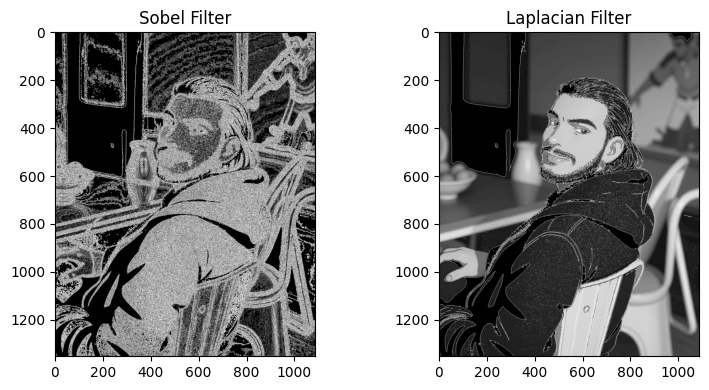

In [40]:
def apply_laplacian(image):
    kernel = np.array([[0, 1, 0],
                      [1, -4, 1],
                      [0, 1, 0]])
    padded = np.pad(image, pad_width=1, mode='reflect')
    result = np.zeros_like(image)
    for i in range(image.shape[0]):
        for j in range(image.shape[1]):
            result[i,j] = np.sum(padded[i:i+3, j:j+3] * kernel)
    return image - result

def apply_sobel(image):
    sobel_x = np.array([[-1, 0, 1],
                        [-2, 0, 2],
                        [-1, 0, 1]])
    sobel_y = np.array([[-1, -2, -1],
                        [0, 0, 0],
                        [1, 2, 1]])
    padded = np.pad(image, pad_width=1, mode='reflect')
    gx = np.zeros_like(image)
    gy = np.zeros_like(image)
    
    for i in range(image.shape[0]):
        for j in range(image.shape[1]):
            gx[i,j] = np.sum(padded[i:i+3, j:j+3] * sobel_x)
            gy[i,j] = np.sum(padded[i:i+3, j:j+3] * sobel_y)
    
    return np.sqrt(gx**2 + gy**2).astype(np.uint8)



sobel_filtered = apply_sobel(img)
laplacian_filtered = apply_laplacian(img)
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(8, 4))
ax1.imshow(sobel_filtered, cmap='gray')
ax1.set_title('Sobel Filter')
ax2.imshow(laplacian_filtered, cmap='gray')
ax2.set_title('Laplacian Filter')
plt.tight_layout()
plt.show()  


## Image Magnification ( replication and interpolation )

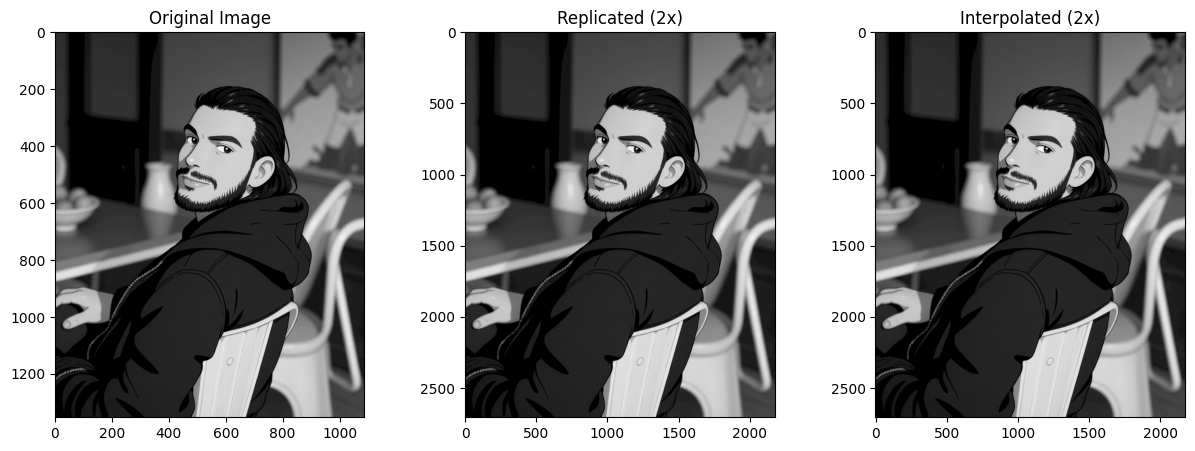

In [41]:
def magnify_replication(image, scale_factor):
    """
    Magnify image using pixel replication
    """
    height, width = image.shape
    new_height = height * scale_factor
    new_width = width * scale_factor
    
    magnified = np.zeros((new_height, new_width), dtype=np.uint8)
    
    for i in range(new_height):
        for j in range(new_width):
            magnified[i,j] = image[i//scale_factor, j//scale_factor]
            
    return magnified

def magnify_interpolation(image, scale_factor):
    """
    Magnify image using bilinear interpolation
    """
    height, width = image.shape
    new_height = height * scale_factor
    new_width = width * scale_factor
    
    magnified = np.zeros((new_height, new_width), dtype=np.uint8)
    
    for i in range(new_height):
        for j in range(new_width):
            # Get source coordinates
            x = j / scale_factor
            y = i / scale_factor
            
            # Get four nearest neighbor coordinates
            x1, y1 = int(np.floor(x)), int(np.floor(y))
            x2, y2 = min(x1 + 1, width - 1), min(y1 + 1, height - 1)
            
            # Calculate interpolation weights
            wx = x - x1
            wy = y - y1
            
            # Perform bilinear interpolation
            value = (1 - wx) * (1 - wy) * image[y1, x1] + \
                   wx * (1 - wy) * image[y1, x2] + \
                   (1 - wx) * wy * image[y2, x1] + \
                   wx * wy * image[y2, x2]
                   
            magnified[i,j] = int(value)
            
    return magnified

# Apply both methods and display results
scale_factor = 2
replicated = magnify_replication(img, scale_factor)
interpolated = magnify_interpolation(img, scale_factor)

fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(15, 5))
ax1.imshow(img, cmap='gray')
ax1.set_title('Original Image')
ax2.imshow(replicated, cmap='gray')
ax2.set_title('Replicated (2x)')
ax3.imshow(interpolated, cmap='gray')
ax3.set_title('Interpolated (2x)')
plt.show()